# Driving in Circles

AutomotiveDrivingModels is templated to efficiently run different types of simulations.
Entities are parameterized by their:

- *S* state, which changes over time
- *D* defintion, which does not change over time
- *I* id, typically an `Int`, which uniquely identifies that entity.

In addition to these types, the actions, environment and the driver models can also be parameterized.

This notebook demonstrates a 2D driving simulation where cars drive in a multi-lane stadium.
The types are:

- *S* - `VehicleState`, containing both the global and lane-relative position, and speed
- *D* - `VehicleDef`, containing length, width, and class
- *I* - `Int`

We use a `Roadway` as our environment. The `Roadway` type is based on the RNDF format.

In [1]:
using AutomotiveDrivingModels
using AutoViz

INFO: Recompiling stale cache file /home/tim/.julia/lib/v0.5/AutomotiveDrivingModels.ji for module AutomotiveDrivingModels.


We generate a 3-lane stadium roadway:

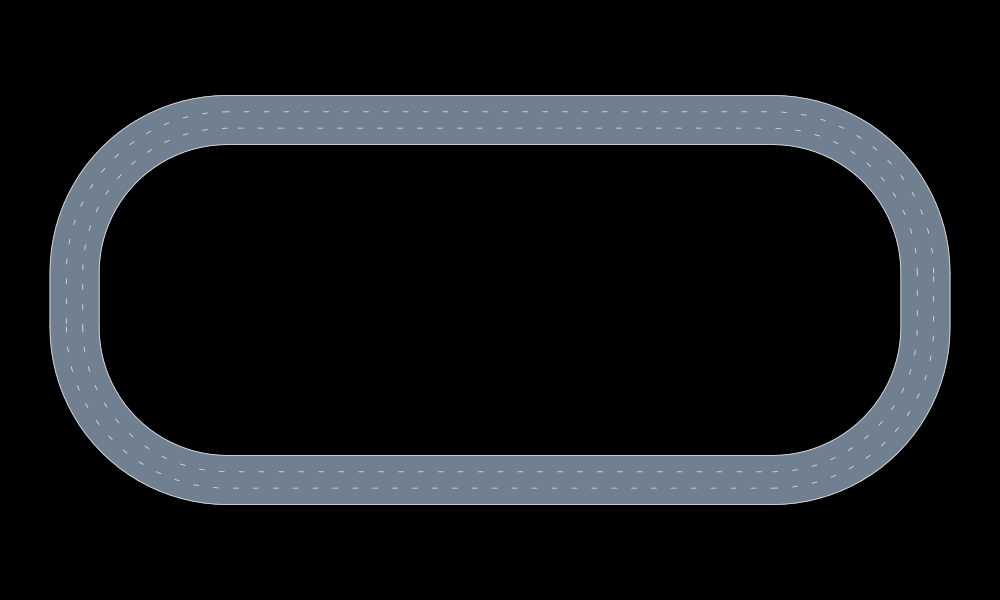

In [2]:
roadway = gen_stadium_roadway(3)

Let's populate a scene.

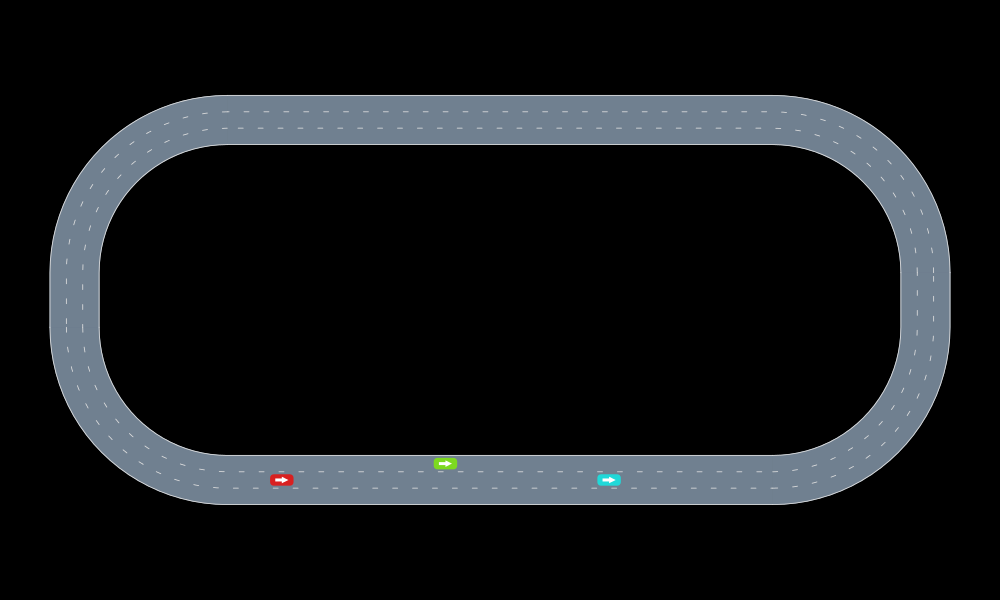

In [3]:
scene = Scene()
push!(scene,Vehicle(VehicleState(VecSE2(10.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 29.0), VehicleDef(), 1))
push!(scene,Vehicle(VehicleState(VecSE2(40.0,0.0,0.0), roadway, 22.0), VehicleDef(), 2))
push!(scene,Vehicle(VehicleState(VecSE2(70.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 27.0), VehicleDef(), 3))

car_colors = get_pastel_car_colors(scene)
render(scene, roadway, cam=FitToContentCamera(), car_colors=car_colors)

Let's assign driver models.

In [4]:
timestep = 0.1

models = Dict{Int, DriverModel}()
models[1] = LatLonSeparableDriver( # produces LatLonAccels
        ProportionalLaneTracker(), # lateral model
        IntelligentDriverModel(), # longitudinal model
)
models[2] = Tim2DDriver(timestep,
        mlane = MOBIL(timestep),
    )
models[3] = StaticDriver{AccelTurnrate, MvNormal}(MvNormal([0.0,0.0], [1.0,0.1]))

nticks = 100
rec = SceneRecord(nticks+1, timestep)
simulate!(rec, scene, roadway, models, nticks)
# render(rec[0], roadway, [CarIDOverlay()], cam=cam, canvas_height=100)

LoadError: Could not find segid 0 in roadway